In [1]:

import pandas as pd
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from pyprojroot import here

# load the tab separated file
df = pd.read_csv(here("./data/db/final/kaggle/paper_text/comm_use_subset_pdf_json.tsv"), sep="\t")


In [3]:
# defining risk factor keywords
targets = {"smoke",  "diabetes", "neonates", "pregnancy",
                "pregnant", "heart", "co-infection", "coinfection", "comorbidity"}



word_stemmer = PorterStemmer()
map = {}
# convert target terms into their stemmed versions for successfull matching
for term in targets:
    stemmedTerm = word_stemmer.stem(term)
    
    map[stemmedTerm] = 0
    
    

In [4]:
# searching for words in the text
text_data = df['text']
for text in text_data:
    for word in map:
        if word in text:
            map[word] = map[word]+1;
print(map)          

{'heart': 1054, 'smoke': 256, 'diabet': 706, 'neonat': 579, 'coinfect': 529, 'pregnant': 496, 'pregnanc': 407, 'co-infect': 835, 'comorbid': 412}


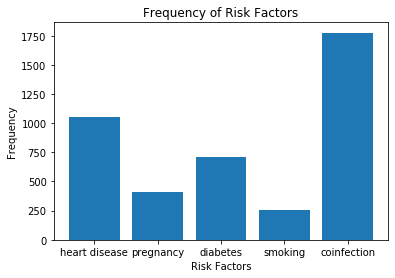

In [5]:
to_graph = {"heart disease": map['heart'], "pregnancy": map['pregnanc'],
            "diabetes": map["diabet"], "smoking": map["smoke"], 
            "coinfection": map['coinfect']+map['co-infect']+map['comorbid']}

keys = to_graph.keys()
values = to_graph.values()

plt.figure()
plt.bar(keys, values)
plt.title("Frequency of Risk Factors")
plt.xlabel("Risk Factors")
plt.ylabel("Frequency")
plt.show()
